## A sniplet generating data simulating a high throughput expression analysis experiment

In [3]:
import numpy as np
import numpy.random as npr
import pandas as pd

def generate_expression_data(n_analytes=100, n_samples=2, n_replicates=3, p_regulated=0.2, mean_offset=3.0, var=0.2, diff_var=2.0):
    # Here we follow a convension, The first sample is the reference i.e. have all label 1
    labels = npr.binomial(1, p_regulated, (n_analytes,n_samples-1))
    template = np.hstack((np.zeros((n_analytes,1)),labels))
    
    # We expand the template labels into several replicates
    regulated = np.repeat(template,n_replicates, axis=1)
    
    # If the reading is regulated, offset it with a random offset sampled from the normal distribution 
    offset = regulated*npr.normal(0,diff_var,(n_analytes,1))
    
    # Model a differentexpression level for the different analytes
    expr_level = np.ones((n_analytes,n_samples*n_replicates))*npr.normal(mean_offset,mean_offset,(n_analytes,1))
    
    # add noice for each measurement
    expression = npr.normal(offset+expr_level,var,(n_analytes,n_replicates*n_samples))
    expression = 2**expression
    
    analyte_names = ["a"+str(i+1) for i in range(n_analytes)]
    sample_names = ["s"+str(i+1)+'_'+str(j+1) for i in range(n_samples) for j in range(n_replicates)]
    
    # Create a dataframe for expression values
    expr_df = pd.DataFrame(expression,columns=sample_names,index=analyte_names)
    expr_df.loc["Sample",:] = [i+1 for i in range(n_samples) for j in range(n_replicates)]
    
    # Create a dataframe with answers if the reading was modeled as differential or not
    label_df = pd.DataFrame(template,columns=[i+1 for i in range(n_samples)],index=analyte_names)
                
    return expr_df,label_df

In [29]:
data_labels = generate_expression_data(n_analytes=10000)[1][:]
data = generate_expression_data(n_analytes=10000)[0][:-1]

In [32]:
import scipy.stats as scistat

pval_plur = []
for i in range(0, data.shape[0]):
    pval_plur.append(scistat.ttest_ind(data.iloc[i,:3], data.iloc[i,3:])[1])
    

m = len(pval_plur)

pval_plur_sorted = sorted(pval_plur)

lambd = 0.5
t = 0.05



i = 0
for j in range(0, len(pval_plur)):
    if pval_plur[j] > lambd:
        i += 1
    else:
        next
pval_greater_than_lambd = i

pi_zero = (pval_greater_than_lambd)/(m*(1-lambd))

q_of_pi_of_m = pi_zero*pval_plur_sorted[-1]

q_of_pi_zero = []
for i in reversed(range(0, len(pval_plur_sorted))):
    q_of_pi_zero.append(pi_zero*pval_plur_sorted[i])


In [33]:
pval_greater_than_lambd

4104

0.59644399161859618

In [108]:
pval_greater_than_lambd

5953

In [34]:
pi_zero

0.8208

5.

In [11]:
q_of_pi_zero[-1]

1.765493583942106e-08

#### 5. Plot the (simulated) number of differential expression genes as a function of q-value threshold.

(array([ 2535.,   872.,   854.,   818.,   817.,   831.,   846.,   780.,
          802.,   845.]),
 array([  2.06128844e-08,   8.20736662e-02,   1.64147312e-01,
          2.46220957e-01,   3.28294603e-01,   4.10368248e-01,
          4.92441894e-01,   5.74515540e-01,   6.56589185e-01,
          7.38662831e-01,   8.20736476e-01]),
 <a list of 10 Patch objects>)

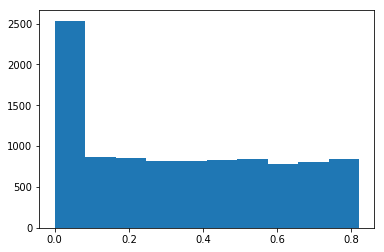

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.hist(q_of_pi_zero)

###### 6. Plot the difference between q-values and the actual fraction of null statistics (using the labels from the generator).

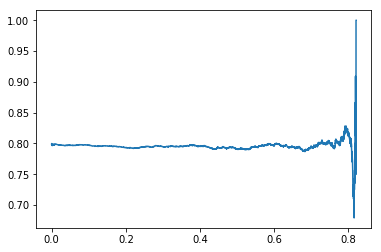

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt
from pylab import *

# True positives in data
(data_labels.iloc[:,1] == 1).describe()[3]

plt.plot(q_of_pi_zero, cumsum(1-data_labels.iloc[:,1])/range(1, len(1-data_labels.iloc[:,1])+1));

In [40]:
q_of_pi_zero

[0.82073647631370128,
 0.8207278019762464,
 0.82071938144174139,
 0.820654402072168,
 0.82050474258978434,
 0.82020806387547418,
 0.81967865277695429,
 0.81949570172773178,
 0.81943042338785255,
 0.81941074592298913,
 0.81932935251707661,
 0.81931959998063819,
 0.81925597593409216,
 0.8189046356700368,
 0.81888933028287192,
 0.81885711912010106,
 0.81881652141865668,
 0.8186460661019529,
 0.8185934100609229,
 0.81858993455747053,
 0.81856224113574494,
 0.8184414132219866,
 0.81810723529486817,
 0.81809866105165607,
 0.81808629027094559,
 0.8179237633859463,
 0.81757983476492602,
 0.81743978391899919,
 0.817435164360517,
 0.81738661405644786,
 0.81734372682021306,
 0.81729262667372193,
 0.81725845912227679,
 0.81715249761701059,
 0.81712892381667535,
 0.81700023780276887,
 0.81694509917288971,
 0.8168812952946799,
 0.81649804243441104,
 0.81628472886685399,
 0.81624770341605712,
 0.81609886400687148,
 0.81607097334388434,
 0.81604904875523743,
 0.81597656506407834,
 0.81596820445994489,

a1        1.0
a2        1.0
a3        1.0
a4        0.0
a5        1.0
a6        1.0
a7        1.0
a8        1.0
a9        1.0
a10       1.0
a11       1.0
a12       0.0
a13       1.0
a14       1.0
a15       1.0
a16       0.0
a17       1.0
a18       1.0
a19       1.0
a20       1.0
a21       1.0
a22       0.0
a23       1.0
a24       1.0
a25       1.0
a26       0.0
a27       0.0
a28       1.0
a29       1.0
a30       1.0
         ... 
a9971     1.0
a9972     0.0
a9973     1.0
a9974     1.0
a9975     1.0
a9976     1.0
a9977     1.0
a9978     1.0
a9979     1.0
a9980     1.0
a9981     1.0
a9982     1.0
a9983     1.0
a9984     0.0
a9985     0.0
a9986     1.0
a9987     0.0
a9988     1.0
a9989     1.0
a9990     1.0
a9991     1.0
a9992     1.0
a9993     0.0
a9994     1.0
a9995     0.0
a9996     1.0
a9997     1.0
a9998     1.0
a9999     1.0
a10000    1.0
Name: 2, Length: 10000, dtype: float64